In [4]:
#Import Library
import pandas as pd


In [5]:
#Import Data
df = pd.read_csv('E:/UDAYANA TI SMT 6/1. DATA MINING (A)/PROJEK DATA MINING/datamining-klp13/twt_emotion_analysis/data_cleaned.csv')

In [6]:
print(df)

      Sl no                                             Tweets     Search key   
0         1   #1: @fe ed "RT @MirayaDizon1: Time is ticking...  happy moments  \
1         3   #3: @Ris ♡ ed "Happy birthday to one smokin h...  happy moments   
2         4   #4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...  happy moments   
3         5   #5: @Madhurima wth u vc♥ ed "Good morning dea...  happy moments   
4         7   #7: @Eric Rogers ed "@CaitlinUnruh The movie ...  happy moments   
...     ...                                                ...            ...   
7851  10015  Tweet #84: @𝐚𝐧𝐢 [🛫] tweeted "you're not irrita...     irritating   
7852  10016  Tweet #85: @Matteo tweeted "@GameSpot @Frannkc...     irritating   
7853  10017  Tweet #86: @𝐚𝐧𝐢𝐬𝐭𝐨𝐧 tweeted "@BRATgiirl_ that’...     irritating   
7854  10018  Tweet #87: @Chowkidar Ricky Sharma tweeted "@M...     irritating   
7855  10019  Tweet #88: @Katoe.EXE tweeted "u know what i h...     irritating   

     Feeling               

In [7]:
df.isnull().sum()

Sl no              0
Tweets             0
Search key         0
Feeling            0
Processed_tweet    0
dtype: int64

In [8]:
tweet = df['Processed_tweet']
print(tweet)

0       time ticking fast relive past happy moment joy...
1       happy birthday one smokin hot mama love much l...
2       jwinnie best cheer jwinnie omg left min msg aj...
3       wth u vc good morning dear wishing day fill su...
4       rogers movie made happy several way think rely...
                              ...                        
7851            tweet irritating booooooooo love omg love
7852    tweet controversy caus yes know expect kind co...
7853             tweet irritating wish people car kid wtf
7854    ricky sharma tweet g aapne besharmi ki saari h...
7855    exe tweet u know hate indie alternative whatev...
Name: Processed_tweet, Length: 7856, dtype: object


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Processed_tweet'], df['Feeling'], test_size=0.2, random_state=42)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
classifier = DecisionTreeClassifier()
classifier.fit(X_train_tfidf, y_train)

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [12]:
X_test_tfidf = vectorizer.transform(X_test)

In [13]:
y_pred_dt = classifier.predict(X_test_tfidf)
y_pred_nb = naive_bayes.predict(X_test_tfidf)
y_pred_knn = knn.predict(X_test_tfidf)

In [14]:
from sklearn.metrics import classification_report
akurasi_dt = classification_report(y_test, y_pred_dt, digits=4)
akurasi_nb = classification_report(y_test, y_pred_nb, digits=4)
akurasi_knn = classification_report(y_test, y_pred_knn, digits=4)
print('akurasi dt:\n', akurasi_dt)
print('\n')
print('akurasi nb:\n', akurasi_nb)
print('\n')
print('akurasi knn:\n', akurasi_knn)

akurasi dt:
               precision    recall  f1-score   support

       angry     0.8835    0.8667    0.8750       210
     disgust     0.9070    0.8864    0.8966        88
        fear     0.8438    0.8000    0.8213       135
       happy     0.8629    0.8974    0.8798       624
         sad     0.9046    0.8929    0.8987       467
    surprise     0.9286    0.8125    0.8667        48

    accuracy                         0.8804      1572
   macro avg     0.8884    0.8593    0.8730      1572
weighted avg     0.8808    0.8804    0.8803      1572



akurasi nb:
               precision    recall  f1-score   support

       angry     0.9630    0.2476    0.3939       210
     disgust     1.0000    0.1818    0.3077        88
        fear     1.0000    0.1926    0.3230       135
       happy     0.6187    0.9776    0.7578       624
         sad     0.7708    0.7923    0.7814       467
    surprise     1.0000    0.2083    0.3448        48

    accuracy                         0.6896      

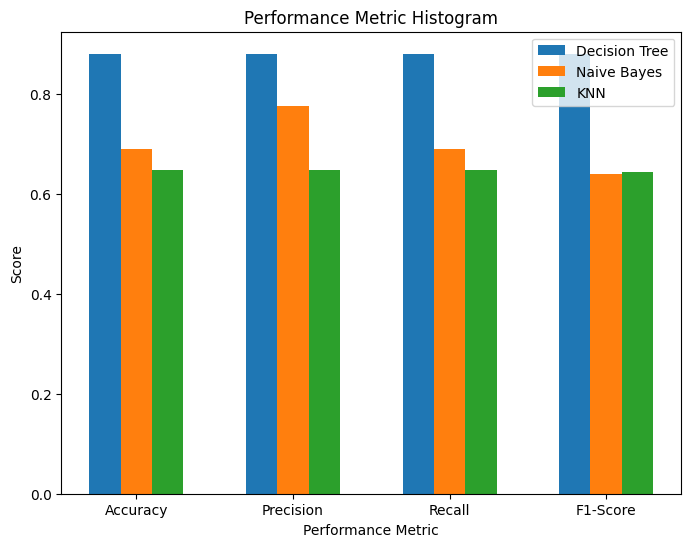

In [23]:
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Data metrik kinerja
performance_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Classification report
akurasi_dt = classification_report(y_test, y_pred_dt, digits=4, output_dict=True)
akurasi_nb = classification_report(y_test, y_pred_nb, digits=4, output_dict=True)
akurasi_knn = classification_report(y_test, y_pred_knn, digits=4, output_dict=True)

# Mengambil metrik kinerja dari setiap laporan klasifikasi
score_dt = [akurasi_dt['accuracy'], akurasi_dt['weighted avg']['precision'], akurasi_dt['weighted avg']['recall'], akurasi_dt['weighted avg']['f1-score']]
score_nb = [akurasi_nb['accuracy'], akurasi_nb['weighted avg']['precision'], akurasi_nb['weighted avg']['recall'], akurasi_nb['weighted avg']['f1-score']]
score_knn = [akurasi_knn['accuracy'], akurasi_knn['weighted avg']['precision'], akurasi_knn['weighted avg']['recall'], akurasi_knn['weighted avg']['f1-score']]

# Menentukan lebar batang histogram
bar_width = 0.2

# Mengatur posisi horizontal untuk setiap batang histogram
positions_dt = np.arange(len(performance_metrics))
positions_nb = positions_dt + bar_width
positions_knn = positions_nb + bar_width

# Membuat histogram
plt.figure(figsize=(8, 6))
plt.bar(positions_dt, score_dt, width=bar_width, label='Decision Tree')
plt.bar(positions_nb, score_nb, width=bar_width, label='Naive Bayes')
plt.bar(positions_knn, score_knn, width=bar_width, label='KNN')
plt.xlabel('Performance Metric')
plt.ylabel('Score')
plt.title('Performance Metric Histogram')
plt.xticks(positions_dt + bar_width, performance_metrics)
plt.legend()
plt.show()


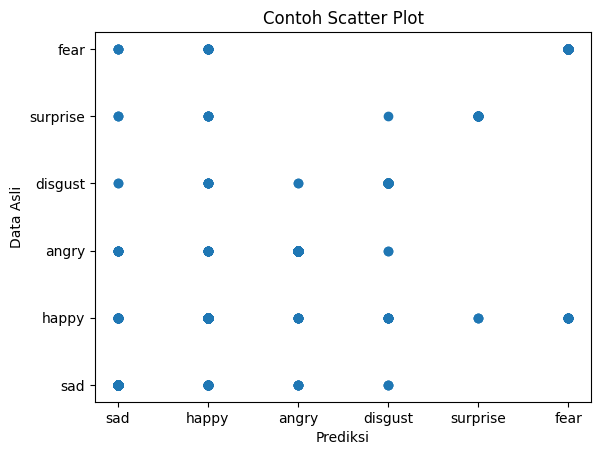

In [ ]:
import matplotlib.pyplot as plt

# Membuat scatter plot
plt.scatter(y_pred_dt, y_test)

# Menambahkan judul dan label sumbu
plt.title('Contoh Scatter Plot')
plt.xlabel('Prediksi')
plt.ylabel('Data Asli')

# Menampilkan scatter plot
plt.show()


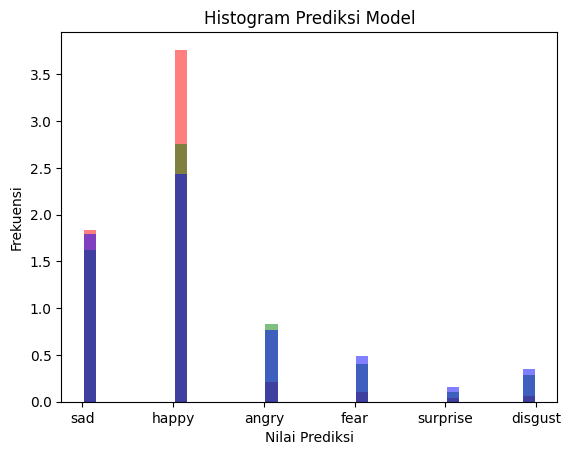

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Membuat histogram tanpa tumpang tindih
fig, axs = plt.subplots()

# Membuat histogram dengan detail warna
axs.hist(y_pred_nb, bins=30, color='red', alpha=0.5, label='Naive Bayes', density=True, histtype='barstacked', rwidth=0.8)
axs.hist(y_pred_knn, bins=30, color='green', alpha=0.5, label='KNN', density=True, histtype='barstacked', rwidth=0.8)
axs.hist(y_pred_dt, bins=30, color='blue', alpha=0.5, label='Decision Tree', density=True, histtype='barstacked', rwidth=0.8)


# Menambahkan judul dan label sumbu
plt.title('Histogram Prediksi Model')
plt.xlabel('Nilai Prediksi')
plt.ylabel('Frekuensi')

# Menampilkan histogram
plt.show()

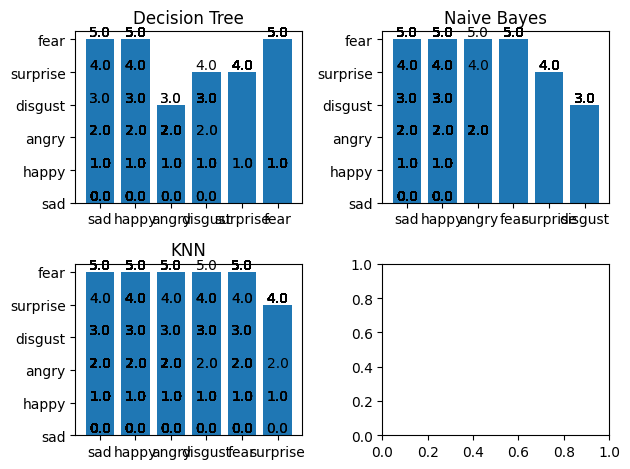

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=2)

# Membuat bar plot
axs[0, 0].bar(y_pred_dt, y_test, label='Decision Tree')
axs[0, 0].set_title('Decision Tree')

axs[0, 1].bar(y_pred_nb, y_test, label='Naive Bayes')
axs[0, 1].set_title('Naive Bayes')

axs[1, 0].bar(y_pred_knn, y_test, label='KNN')
axs[1, 0].set_title('KNN')

# Menampilkan jumlah data di setiap bar
for ax in axs.flat:
    for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

# Menampilkan bar plot
fig.tight_layout()
plt.show()


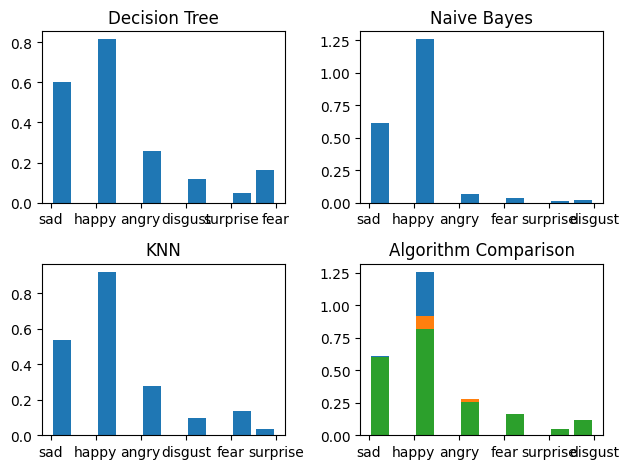

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=2)

axs[0, 0].hist(y_pred_dt, density=True, histtype='barstacked', rwidth=0.8)
axs[0, 0].set_title('Decision Tree')

axs[0, 1].hist(y_pred_nb, density=True, histtype='barstacked', rwidth=0.8)
axs[0, 1].set_title('Naive Bayes')

axs[1, 0].hist(y_pred_knn, density=True, histtype='barstacked', rwidth=0.8)
axs[1, 0].set_title('KNN')

axs[1, 1].hist(y_pred_nb, density=True, histtype='barstacked', rwidth=0.8)
axs[1, 1].hist(y_pred_knn, density=True, histtype='barstacked', rwidth=0.8)
axs[1, 1].hist(y_pred_dt, density=True, histtype='barstacked', rwidth=0.8)
axs[1, 1].set_title('Algorithm Comparison')

fig.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Menginisialisasi CountVectorizer
vectorizer = CountVectorizer()

# Mengubah x_test menjadi vektor fitur
x_test_vectorized = vectorizer.fit_transform(X_test)

# Mendapatkan daftar kata-kata dari vektor fitur
words = vectorizer.get_feature_names_out()

# Membuat list untuk menyimpan hasil kata-kata yang sering muncul berdasarkan label
result = []

# Melakukan perulangan untuk setiap label emosi
for label in set(y_test):
    # Mengambil indeks dokumen dengan label tertentu
    indices = [i for i, x in enumerate(y_test) if x == label]
    # Menggabungkan vektor fitur dari dokumen dengan label tertentu
    combined_vector = x_test_vectorized[indices].sum(axis=0)
    # Mendapatkan indeks kata-kata dengan frekuensi tertinggi
    top_indices = combined_vector.argsort()[0, ::-1][:5]
    # Mengambil kata-kata dengan frekuensi tertinggi dan menggabungkannya menjadi string
    top_words = ', '.join([str(words[idx]) for idx in top_indices]).limit(10)
    # Menambahkan hasil ke dalam list
    result.append({'Label': label, 'Top Words': top_words})

# Membuat DataFrame dari hasil
result_df = pd.DataFrame(result)

# Menampilkan hasil
print(result_df)


AttributeError: 'str' object has no attribute 'limit'

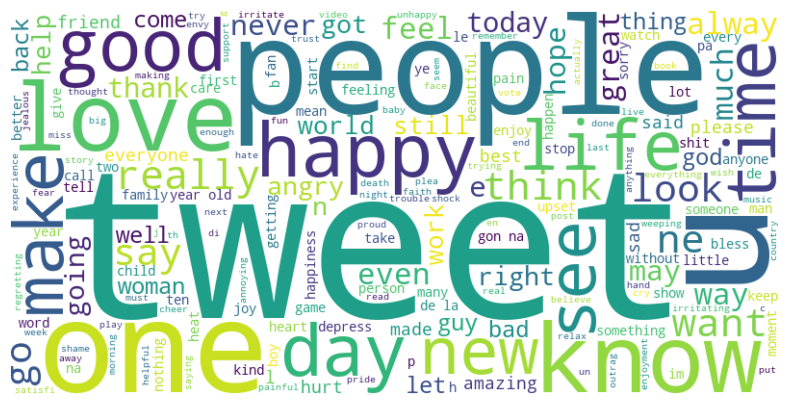

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Menggabungkan teks dari semua tweet menjadi satu string
all_text = ' '.join(df['Processed_tweet'])

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()